<a href="https://colab.research.google.com/github/Sir-ABD/Logistic_regression/blob/main/maternal_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 83.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f1be68d6b67f32f31208f4a381c2bbec29126bd7f009a3c18111fcffec3a8dec
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Maternal Health Risk Data Set.csv")

In [ ]:
data.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [ ]:
data.shape

(1014, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
data.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [ ]:
data['RiskLevel'].value_counts()
#data[''].value_counts()

,count
RiskLevel,
low risk,406
mid risk,336
high risk,272


In [ ]:
#import ydata_profiling as yd

In [ ]:
#profile=yd.ProfileReport(data, explorative=True)
#profile.to_file('report.html')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
data['RiskLevel']=le.fit_transform(data['RiskLevel'])

Encoded as high risk=0, low risk=1, and mid risk=2

In [ ]:
data.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,0
1,35,140,90,13.00,98.0,70,0
2,29,90,70,8.00,100.0,80,0
3,30,140,85,7.00,98.0,70,0
4,35,120,60,6.10,98.0,76,1
5,23,140,80,7.01,98.0,70,0
6,23,130,70,7.01,98.0,78,2
7,35,85,60,11.00,102.0,86,0
8,32,120,90,6.90,98.0,70,2
9,42,130,80,18.00,98.0,70,0


In [ ]:
data.RiskLevel.value_counts()


,count
RiskLevel,
1,406
2,336
0,272


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.drop(columns='RiskLevel', axis=-1)
y=data['RiskLevel']

In [ ]:
print(X)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0      25         130           80  15.0      98.0         86
1      35         140           90  13.0      98.0         70
2      29          90           70   8.0     100.0         80
3      30         140           85   7.0      98.0         70
4      35         120           60   6.1      98.0         76
...   ...         ...          ...   ...       ...        ...
1009   22         120           60  15.0      98.0         80
1010   55         120           90  18.0      98.0         60
1011   35          85           60  19.0      98.0         86
1012   43         120           90  18.0      98.0         70
1013   32         120           65   6.0     101.0         76

[1014 rows x 6 columns]


In [ ]:
print(y)

0       0
1       0
2       0
3       0
4       1
       ..
1009    0
1010    0
1011    0
1012    0
1013    2
Name: RiskLevel, Length: 1014, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=2)

<ipython-input-22-dde3bf73c76c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['RiskLevel'])


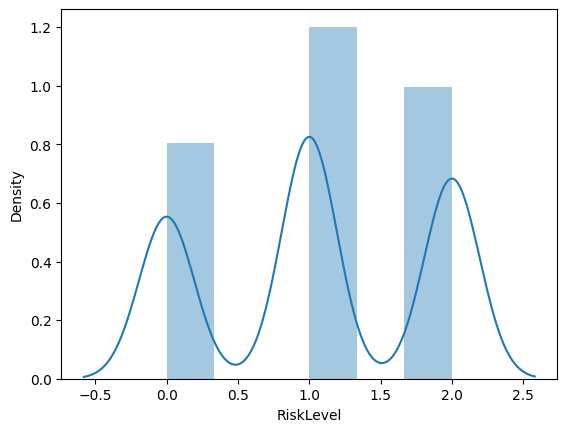

In [ ]:
import seaborn as sns
sns.distplot(data['RiskLevel'])
plt.show()

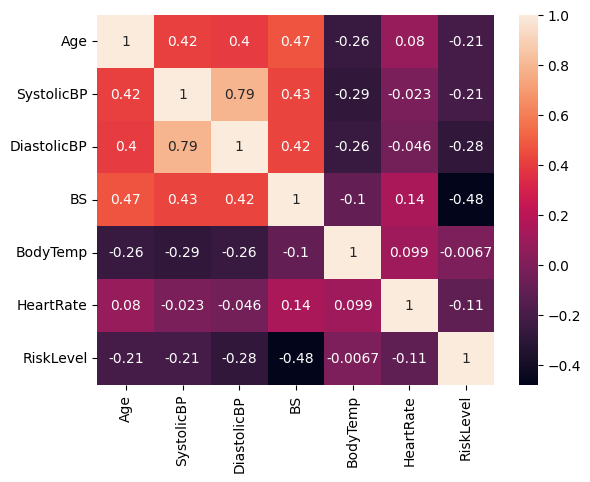

In [ ]:
corr=data.corr()
sns.heatmap(corr, annot=True)
plt.show()

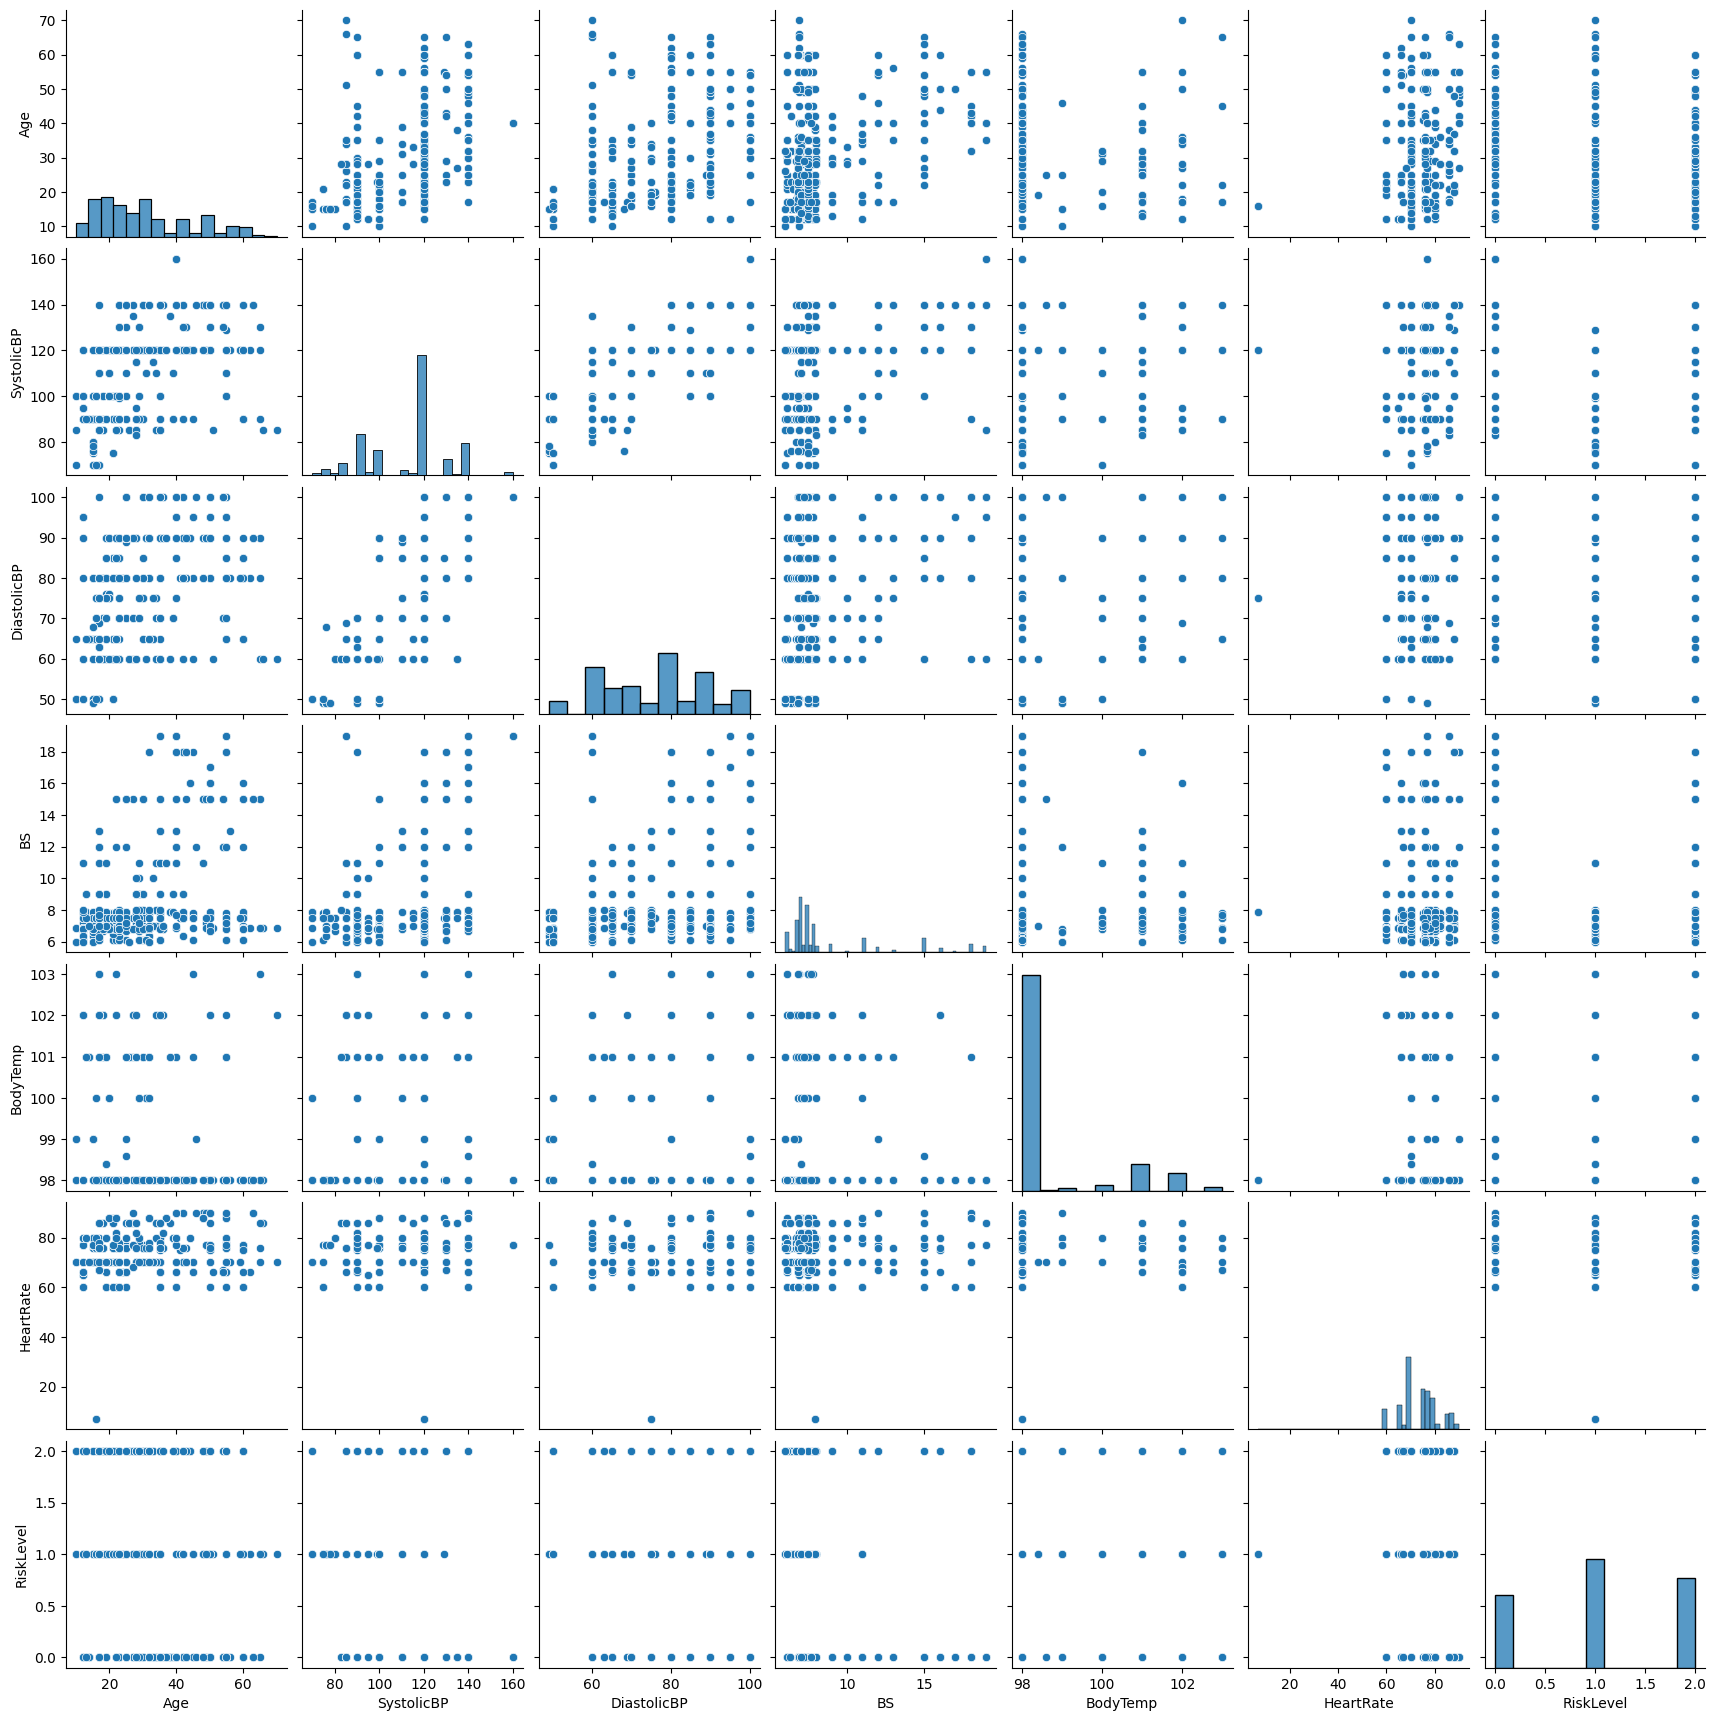

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
x_train=standard.fit_transform(x_train)
x_test=standard.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logit.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.6305418719211823

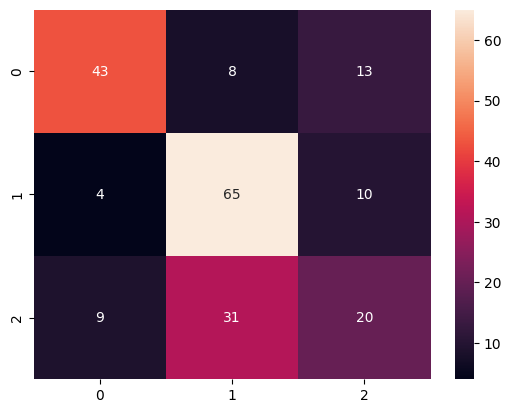

In [ ]:
#cofusion matrix
con=confusion_matrix(y_test,y_pred)
sns.heatmap(con, annot=True)
plt.show()

In [ ]:
#classifiaction report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72        64
           1       0.62      0.82      0.71        79
           2       0.47      0.33      0.39        60

    accuracy                           0.63       203
   macro avg       0.62      0.61      0.61       203
weighted avg       0.62      0.63      0.62       203



In [ ]:
#new data prediction
new_data=[[23,130,70,7.01,98.0,78]]
logit.predict(new_data)

array([0])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dt=DecisionTreeClassifier()
Dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predict=Dt.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_predict))

0.7339901477832512


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pre=rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pre)

0.7438423645320197

In [ ]:
#new data prediction
new_data=[[23,130,70,7.01,98.0,78]]
rf.predict(new_data)

array([0])